In [ ]:
!pip install --upgrade -q scikit-learn pycaret xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 759.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 99.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 89.6 MB/s eta 0:00:00
 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pt
import warnings
warnings.filterwarnings("ignore")
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
%matplotlib inline

In [ ]:
# Read in training data

import pandas as pd

# Replace with your Google Drive shareable link
drive_url = "https://drive.google.com/file/d/1fCa2F93Y4IJODhlojRn570ZihWrnqJ6P/view?usp=sharing"

# Convert the Google Drive URL to a direct download URL
file_id = drive_url.split('/d/')[1].split('/')[0]
download_url = f"https://drive.google.com/uc?id={file_id}"

# Read the CSV file into a DataFrame
df_train = pd.read_csv(download_url)

# Display the first few rows of the DataFrame
print(df_train.head())


   id                                               name    host_id host_name  \
0   1   Clinton Hill Apartment Single Bedroom ! Pratt ~~   30610258  Santiago   
1   2                                      Andy Phillips    6180052   Andrian   
2   3   Stylish, Comfortable, and Affordable in Brooklyn    5957027   Zachary   
3   4         15 min train ride to Times Sq and  US OPEN  101602599         M   
4   5  Sunny 2 bdrm Park Slope Apt w/ Yard 3min to Su...  106168581     Jason   

  neighbourhood_group  neighbourhood  latitude  longitude        room_type  \
0            Brooklyn   Clinton Hill  40.69591  -73.96284     Private room   
1            Brooklyn    Fort Greene  40.68769  -73.97490     Private room   
2            Brooklyn  Crown Heights  40.67667  -73.91750  Entire home/apt   
3              Queens       Woodside  40.74340  -73.90588  Entire home/apt   
4            Brooklyn    South Slope  40.66600  -73.99020  Entire home/apt   

   price  minimum_nights  number_of_reviews 

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27379 entries, 0 to 27378
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              27379 non-null  int64  
 1   name                            27370 non-null  object 
 2   host_id                         27379 non-null  int64  
 3   host_name                       27369 non-null  object 
 4   neighbourhood_group             27379 non-null  object 
 5   neighbourhood                   27379 non-null  object 
 6   latitude                        27379 non-null  float64
 7   longitude                       27379 non-null  float64
 8   room_type                       27379 non-null  object 
 9   price                           27379 non-null  int64  
 10  minimum_nights                  27379 non-null  int64  
 11  number_of_reviews               27379 non-null  int64  
 12  last_review                     

In [ ]:
# Read in test data

import pandas as pd

# Replace with your Google Drive shareable link
drive_url = "https://drive.google.com/file/d/1JjAspKQYR7PI3ibEpM1-uw9Apyj7inPA/view?usp=sharing"
# Convert the Google Drive URL to a direct download URL
file_id = drive_url.split('/d/')[1].split('/')[0]
download_url = f"https://drive.google.com/uc?id={file_id}"

# Read the CSV file into a DataFrame
df_test = pd.read_csv(download_url)

# Display the first few rows of the DataFrame
print(df_test.shape)
print(df_test.head())


(6847, 15)
   id                                      name    host_id       host_name  \
0   1  Creative Vintage Loft in S. Williamsburg     806774  Ali & SweetPea   
1   2  2 beds in nice rooms, JFK&LGA 15 minutes  101657794      Dr. Shirin   
2   3              1 Bedroom Apartment Near ESB  211549023      Studioplus   
3   4       Cozy Groundfloor Apartment w/Garden   22169347           Laura   
4   5         Noho High Rise w/ Private Terrace  221071115              Ty   

  neighbourhood_group      neighbourhood  latitude  longitude  \
0            Brooklyn       Williamsburg  40.70667  -73.96524   
1              Queens          Briarwood  40.70988  -73.80691   
2           Manhattan            Midtown  40.74747  -73.98668   
3            Brooklyn      Crown Heights  40.67580  -73.95578   
4           Manhattan  Greenwich Village  40.72836  -73.99925   

         room_type  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt               2                 86   5/16

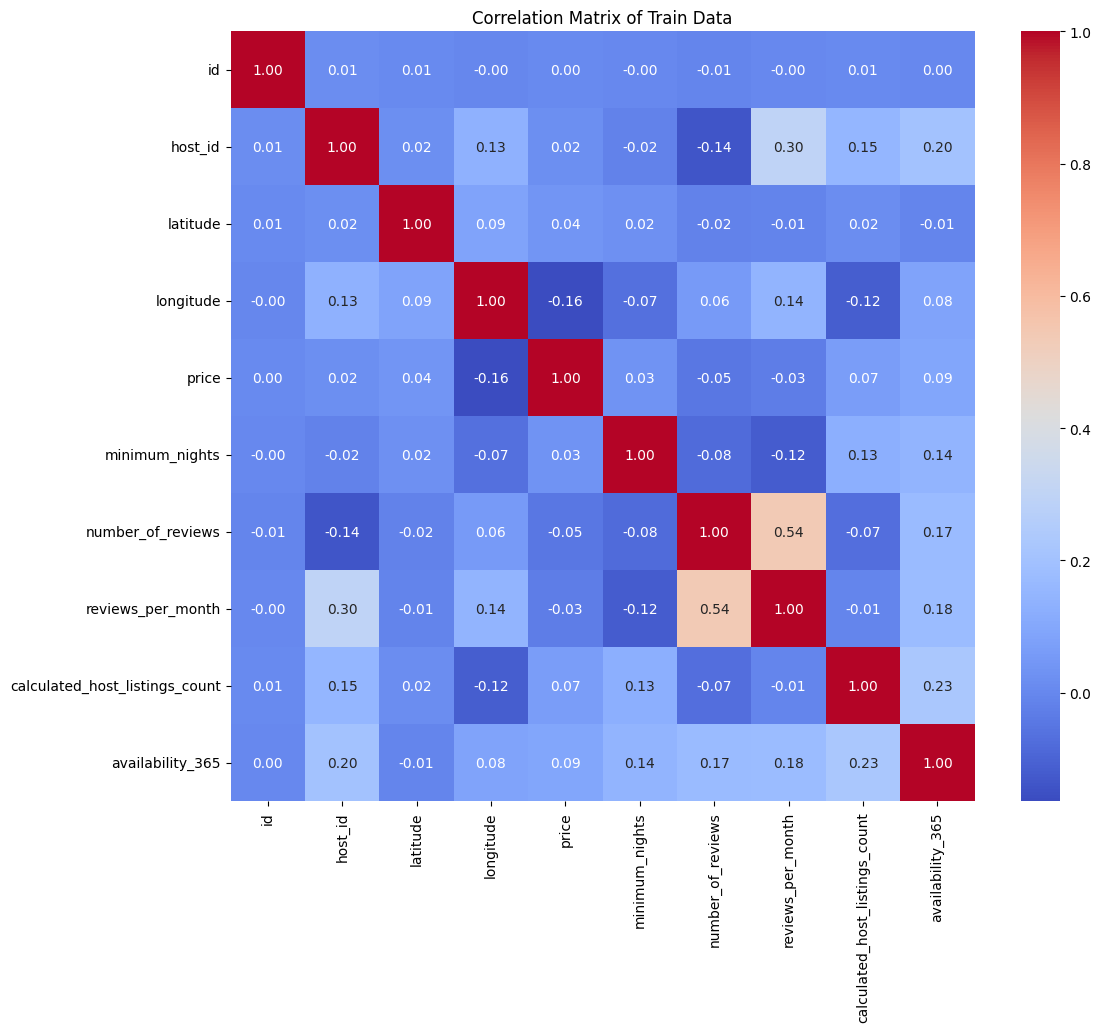

In [ ]:
import matplotlib.pyplot as plt

corr_matrix = df_train.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Train Data')
plt.show()

In [ ]:
# TRANSFORM COORDINATES TO BINS
df_train["longitude"] = ((df_train["longitude"]*100)//1)/100
df_train["latitude"] = ((df_train["latitude"]*100)//1)/100
df_test["longitude"] = ((df_test["longitude"]*100)//1)/100
df_test["latitude"] = ((df_test["latitude"]*100)//1)/100

In [ ]:
# GENERATE SOME NEW FEATURES
df_train['host_density'] = df_train['calculated_host_listings_count'] / abs(df_train['longitude'])
df_test['host_density'] = df_test['calculated_host_listings_count'] / abs(df_test['longitude'])

df_train['demand_score'] = (
    (365 - df_train['availability_365']) / 365 * 0.6 +
    (df_train['reviews_per_month'] / df_train['reviews_per_month'].max()) * 0.4
)
df_test['demand_score'] = (
    (365 - df_test['availability_365']) / 365 * 0.6 +
    (df_test['reviews_per_month'] / df_test['reviews_per_month'].max()) * 0.4
)

In [ ]:
df_train.isnull().sum()

,0
id,0
name,9
host_id,0
host_name,10
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
df_train.duplicated().sum()

0

In [ ]:
df_train.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,host_density,demand_score
count,27379.000000,2.737900e+04,27379.000000,27379.000000,27379.000000,27379.000000,27379.000000,21746.000000,27379.000000,27379.000000,27379.000000,21746.000000
mean,13690.000000,6.820276e+07,40.723815,-73.957108,151.569561,7.056722,23.228131,1.383797,7.228788,113.430293,0.097710,0.420604
std,7903.780846,7.910462e+07,0.054716,0.046354,219.807784,20.194945,44.281418,1.714116,33.173634,132.039807,0.448282,0.211588
min,1.000000,2.438000e+03,40.500000,-74.250000,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.013468,0.000068
25%,6845.500000,7.971896e+06,40.680000,-73.990000,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,0.013519,0.238220
50%,13690.000000,3.114212e+07,40.720000,-73.960000,105.000000,3.000000,5.000000,0.720000,1.000000,45.000000,0.013524,0.524711
75%,20534.500000,1.074344e+08,40.760000,-73.940000,175.000000,5.000000,23.000000,2.030000,2.000000,230.000000,0.027049,0.600615
max,27379.000000,2.743213e+08,40.910000,-73.720000,10000.000000,999.000000,607.000000,58.500000,327.000000,365.000000,4.420711,0.692303


In [ ]:
target = 'price'

# Drop unnecessary columns
df_train = df_train.drop(columns=['id', 'name', 'host_id', 'host_name', 'last_review'])

# Define categorical and numerical features
categorical_features = ['neighbourhood_group', 'neighbourhood', 'room_type']
numerical_features = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
                      'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# Preprocessing steps
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combine preprocessors
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

    Since nrows is smaller than dataset, loading random sample of 2000 rows into pandas...
Shape of your Data Set loaded: (2000, 13)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  5
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    13 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Si

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
neighbourhood_group,object,0.000000,0,,,1 rare categories: ['Staten Island']. Group them into a single category or drop the categories.
neighbourhood,object,0.000000,7,,,Possible high cardinality column with 144 unique values: Use hash encoding or text embedding to reduce dimension.
latitude,float64,0.000000,NA,40.500000,40.890000,Column has 27 outliers greater than upper bound (40.86) or lower than lower bound(40.58). Cap them or remove them.
longitude,float64,0.000000,NA,-74.240000,-73.730000,Column has 94 outliers greater than upper bound (-73.87) or lower than lower bound(-74.06). Cap them or remove them.
room_type,object,0.000000,0,,,No issue
price,int64,0.000000,13,0.000000,7500.000000,Column has 126 outliers greater than upper bound (346.88) or lower than lower bound(-96.12). Cap them or remove them.
minimum_nights,int64,0.000000,1,1.000000,180.000000,Column has 268 outliers greater than upper bound (11.00) or lower than lower bound(-5.00). Cap them or remove them.
number_of_reviews,int64,0.000000,9,0.000000,543.000000,Column has 242 outliers greater than upper bound (55.38) or lower than lower bound(-31.62). Cap them or remove them.
reviews_per_month,float64,21.121121,NA,0.010000,58.500000,"422 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 62 outliers greater than upper bound (4.89) or lower than lower bound(-2.63). Cap them or remove them."
calculated_host_listings_count,int64,0.000000,2,1.000000,327.000000,"Column has 293 outliers greater than upper bound (3.50) or lower than lower bound(-0.50). Cap them or remove them., Column has a high correlation with ['host_density']. Consider dropping one of them."


Number of All Scatter Plots = 15


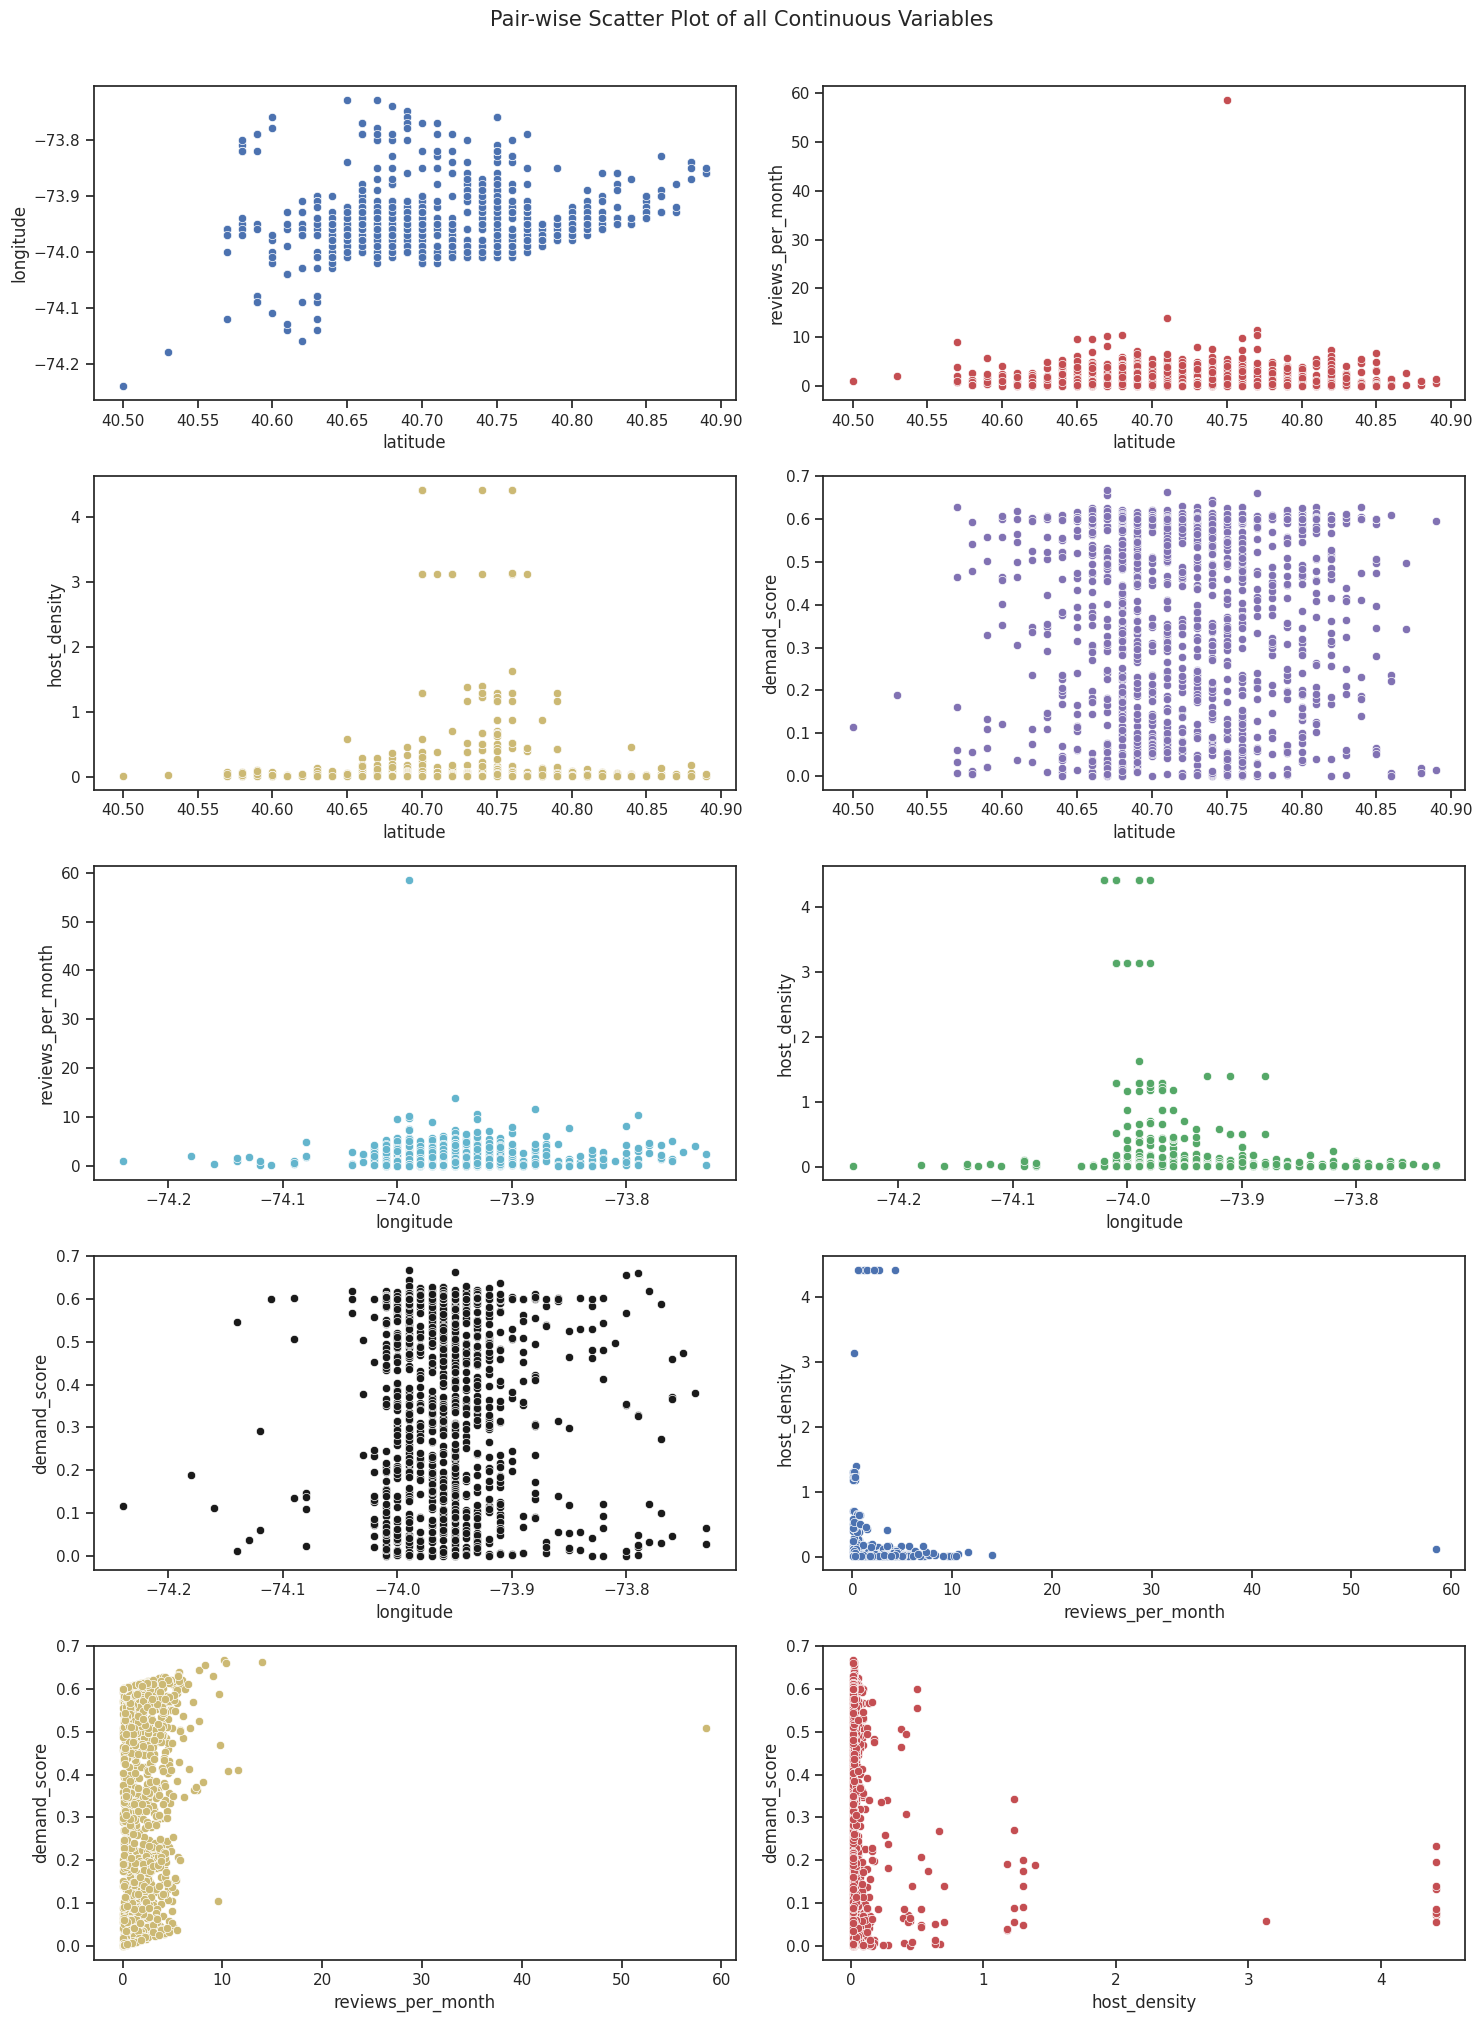

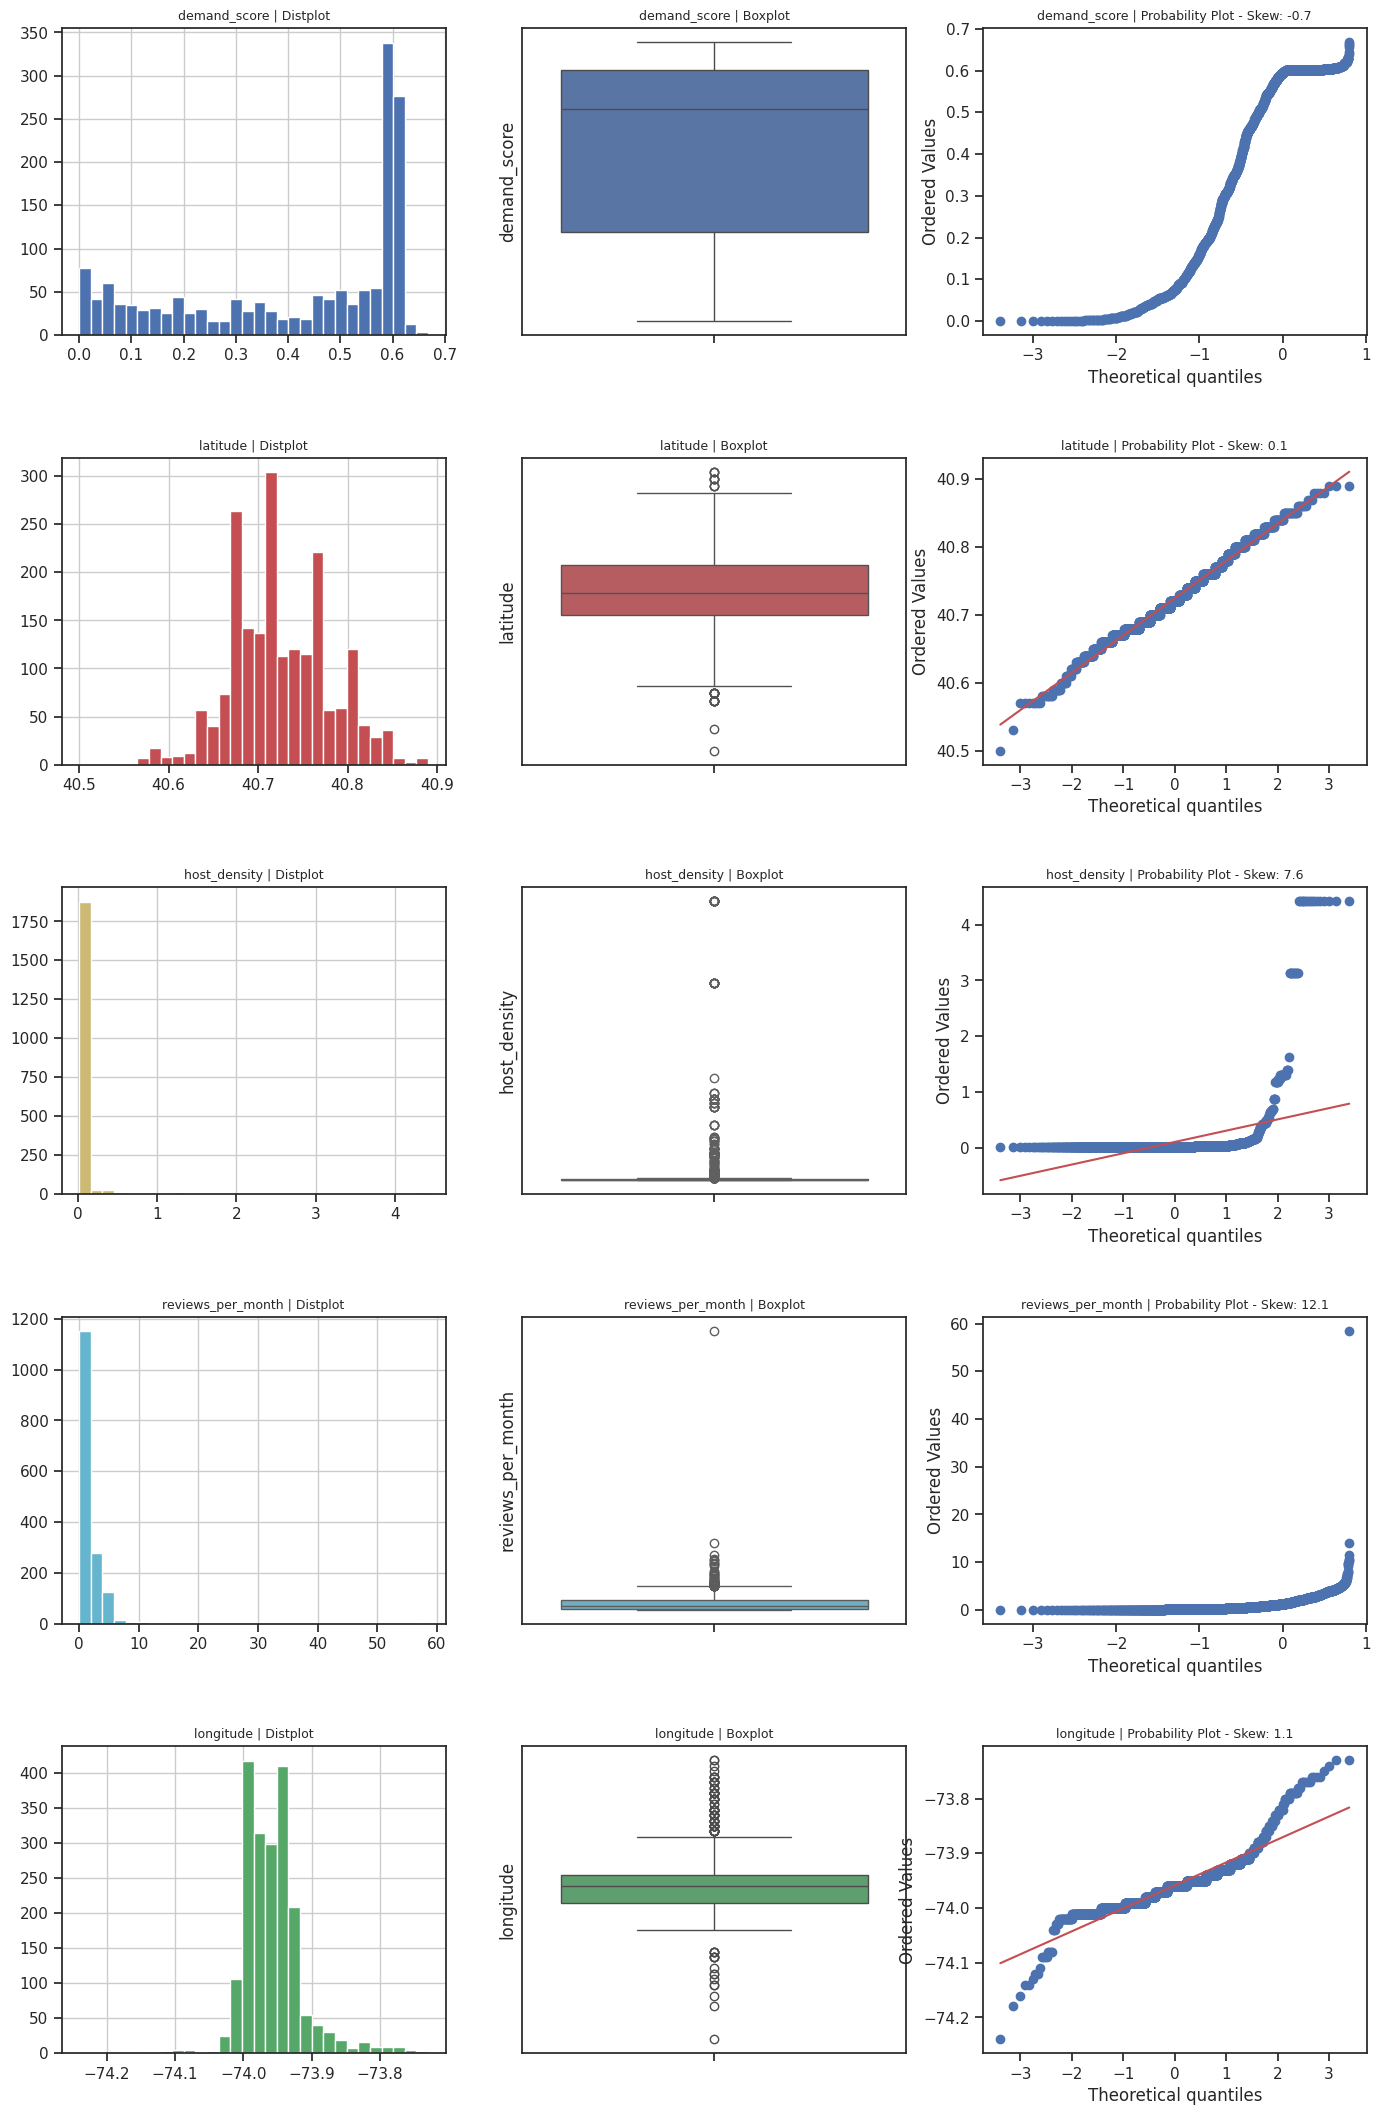

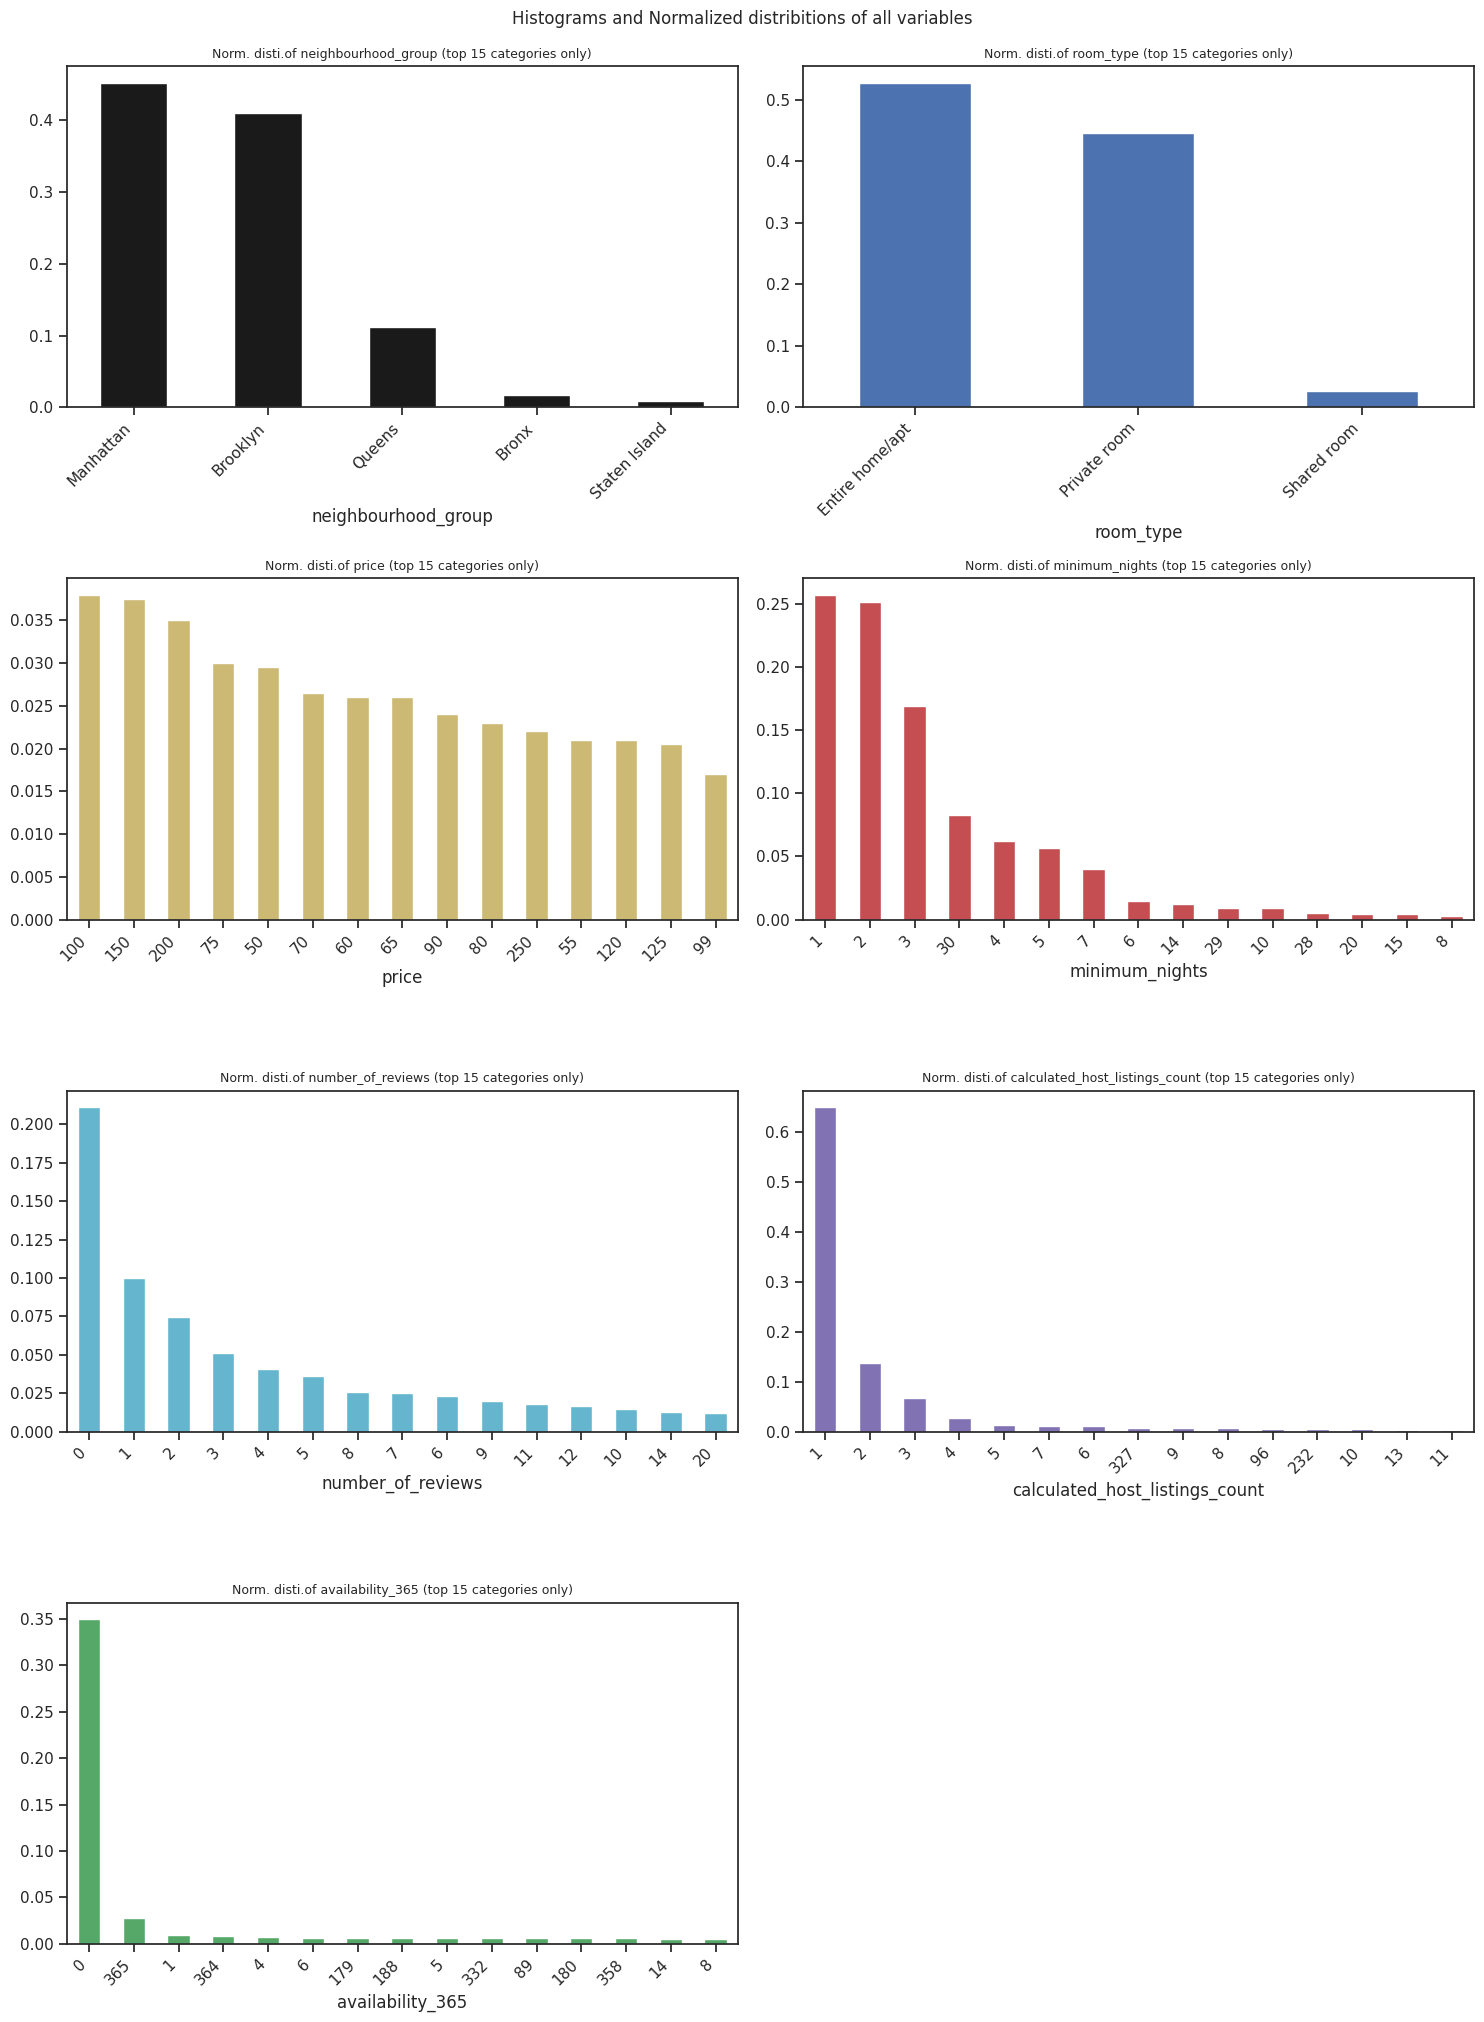

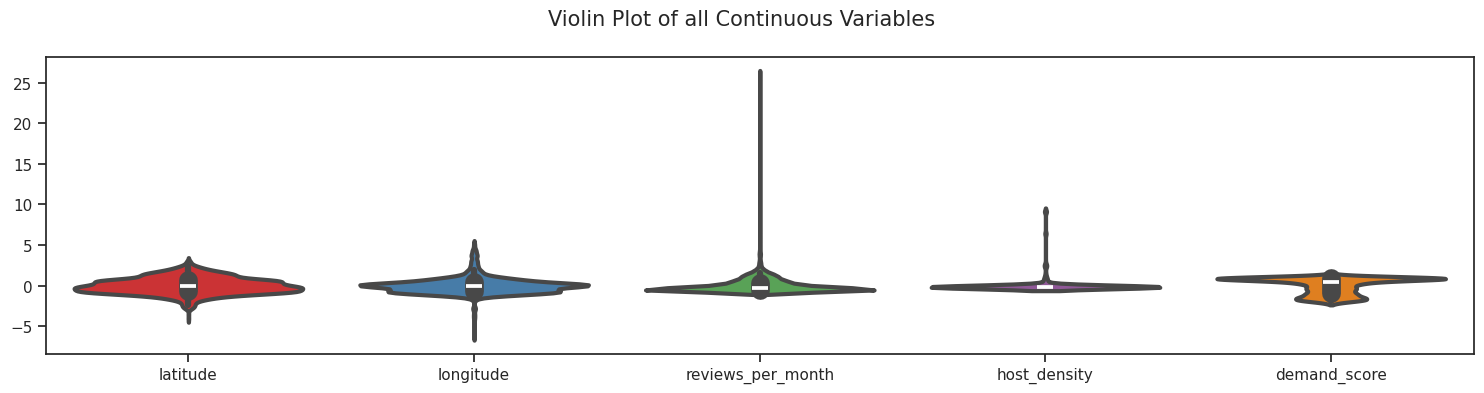

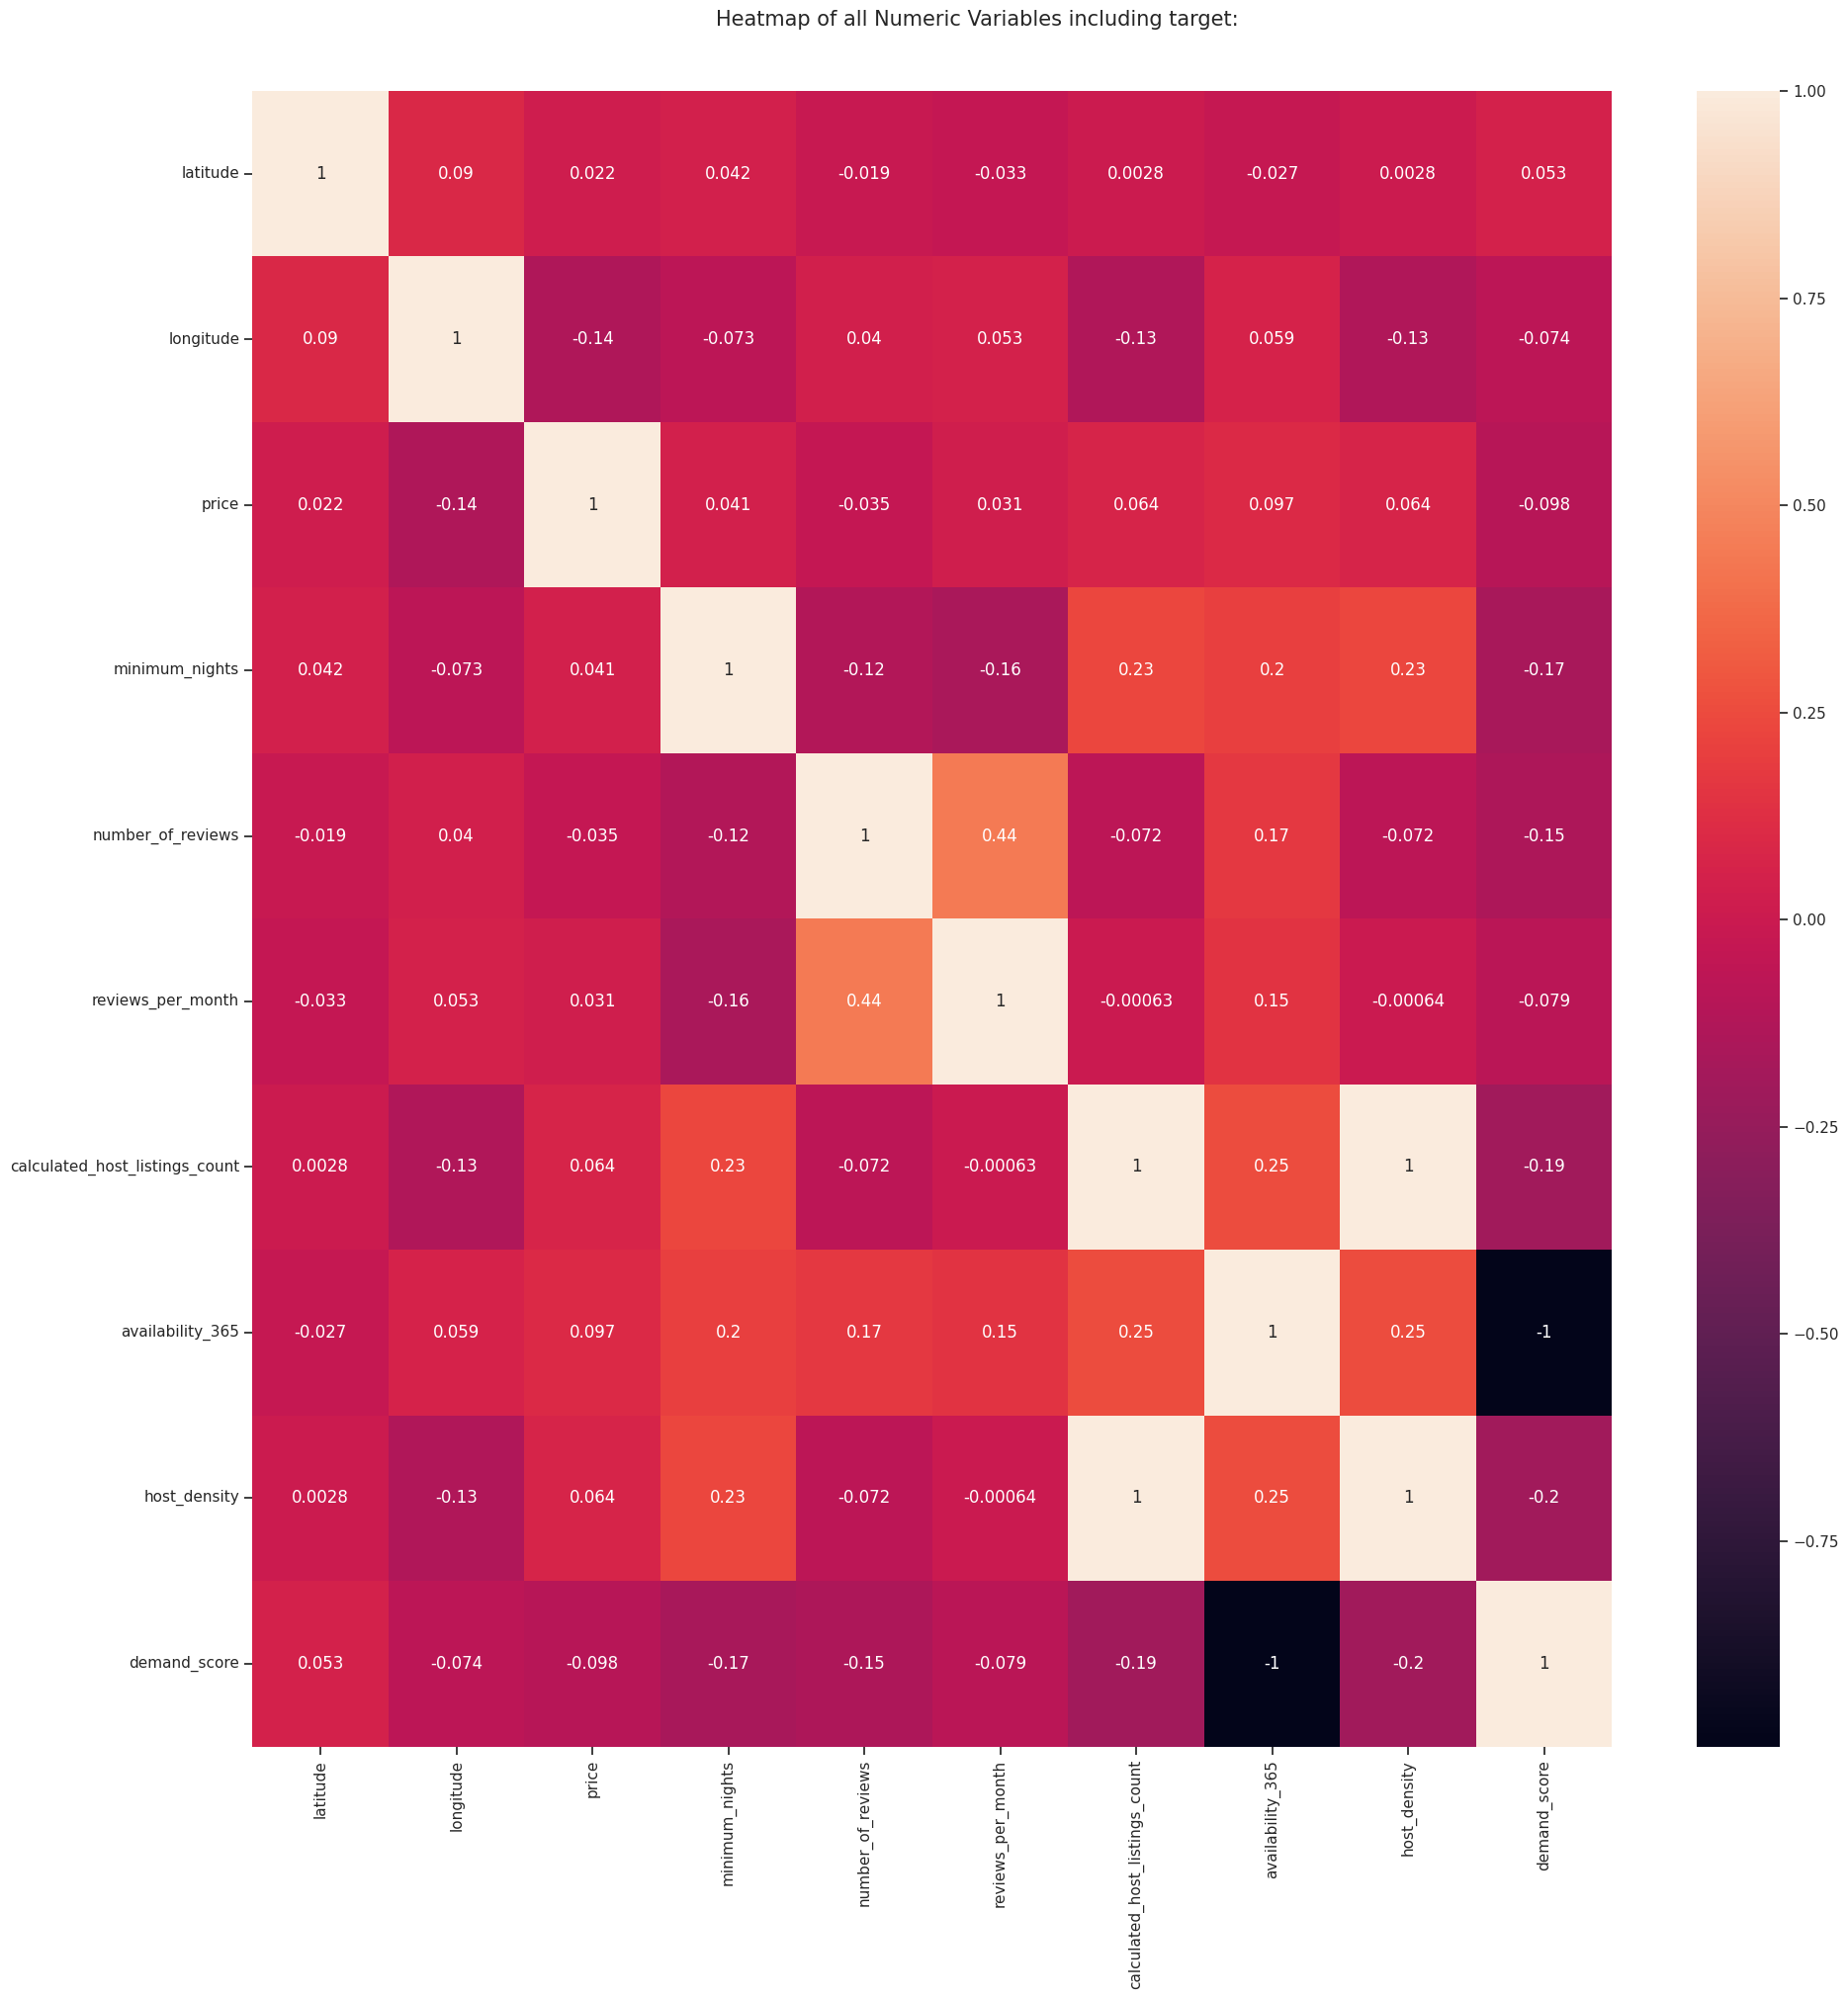

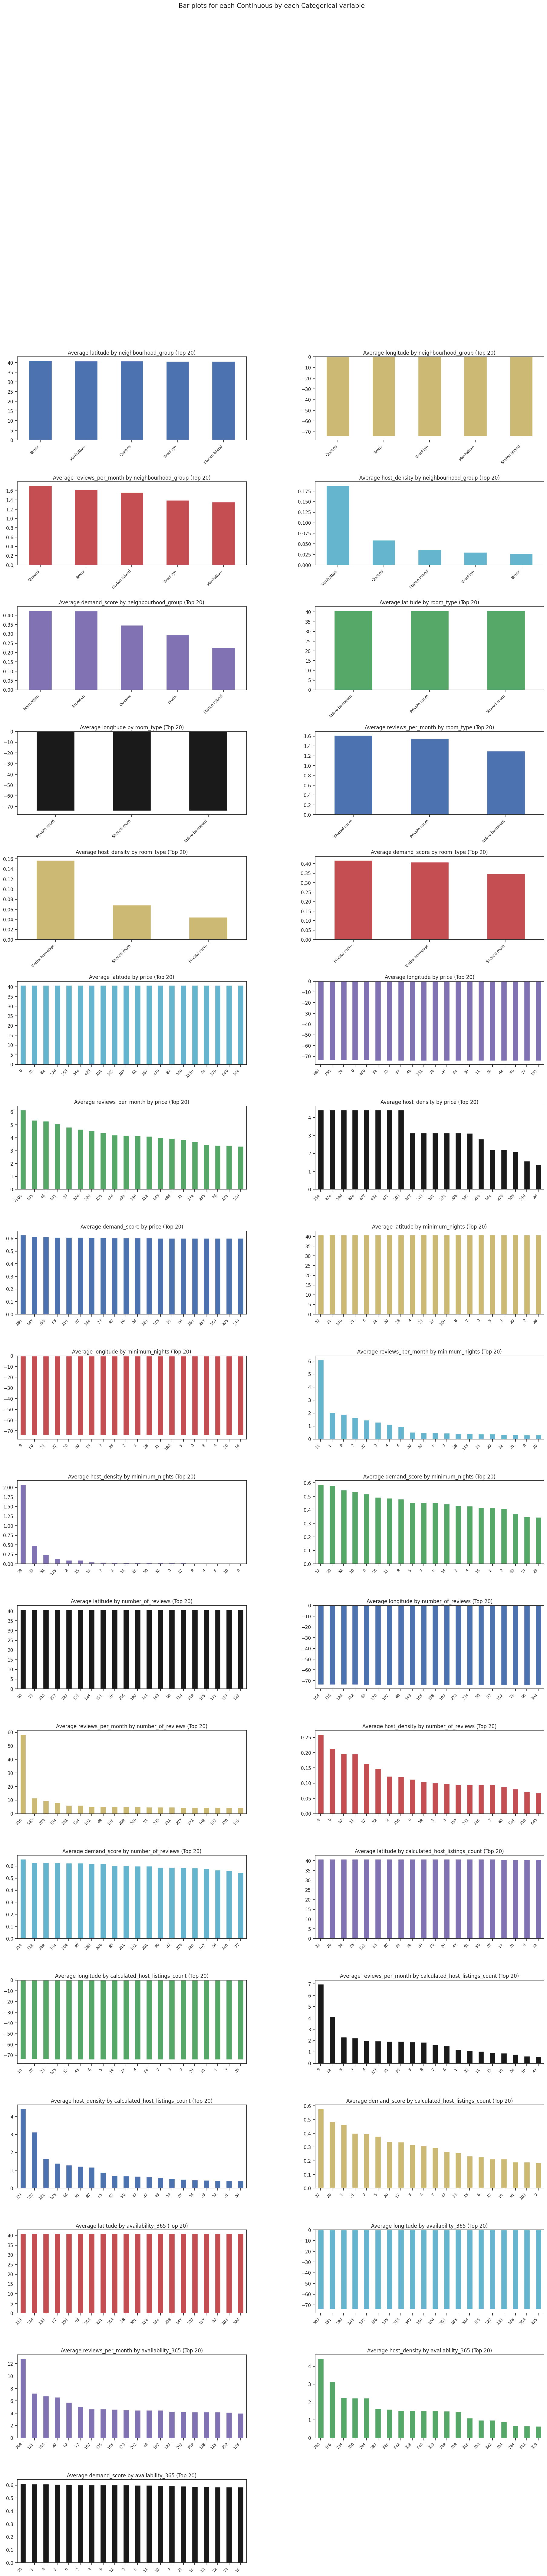

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

Could not draw wordcloud plot for neighbourhood. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

All Plots done
Time to run AutoViz = 24 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


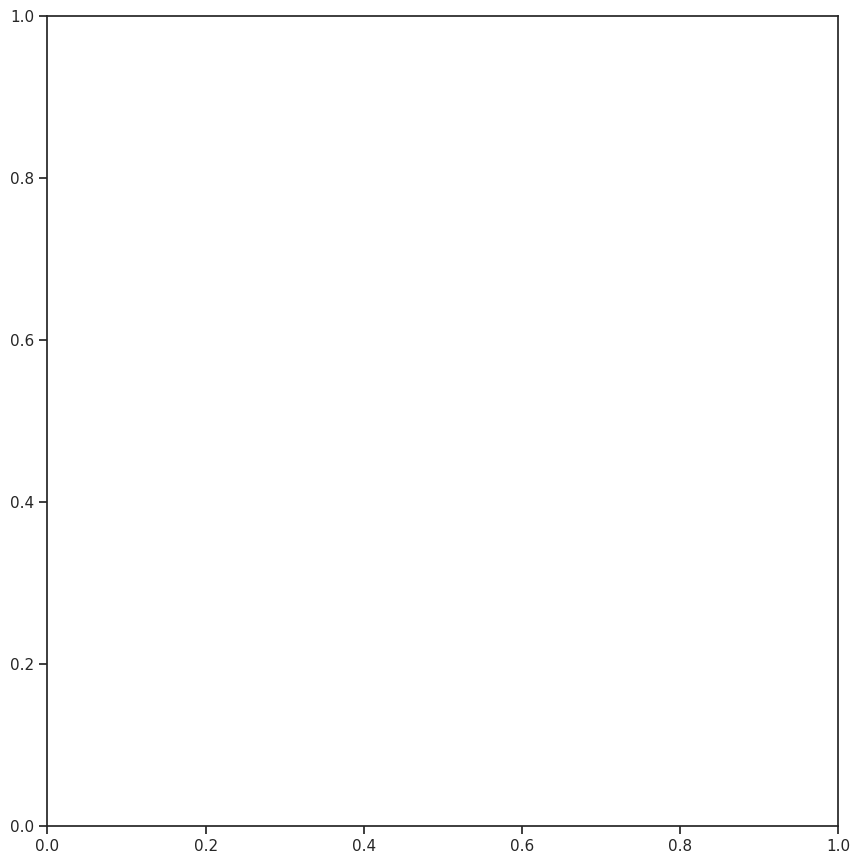

In [14]:
#
!pip install -q pycaret autoviz --upgrade psynlig
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
%matplotlib inline
dftc = AV.AutoViz(filename='', sep ='', dfte = df_train, header = 0,
verbose = 1, lowess = False, chart_format ='png', max_rows_analyzed = 2000, max_cols_analyzed = 30)

In [ ]:
# FINAL STEP - MAKE PREDICTIONS

# Drop unnecessary columns in test data to match training features
df_test = df_test.drop(columns=['id', 'name', 'host_id', 'host_name', 'last_review'], errors='ignore')

# Ensure test dataset has the same feature columns as the training set
missing_cols = set(X.columns) - set(df_test.columns)
if missing_cols:
    for col in missing_cols:
        df_test[col] = 0  # Add missing columns with default value

# Predict on the test dataset
predictions = model.predict(df_test)

# Create a DataFrame with id and price columns
submission_df = pd.DataFrame({
    'id': range(1, len(df_test) + 1),
    'price': predictions
})

# Save to submit.csv
submission_df.to_csv('submit.csv', index=False)
print("submit.csv file created successfully!")


# Alternatives to saving the CSV file
# output_txt_path = "/mnt/data/airbnb_price_predictions.txt"
# df_test[['predicted_price']].to_csv(output_txt_path, index=False, sep="\t")
# output_json_path = "/mnt/data/airbnb_price_predictions.json"
# df_test[['predicted_price']].to_json(output_json_path, orient="records", lines=True)


NotFittedError: Pipeline is not fitted yet.